In [1]:
import sys
import numpy as np

sys.path.insert(0, "/usr/src/code/src")

from pre_process_code.imputation import *
from plots import *
from stats import *
from cd_diagram import *
from aeon.datasets import load_from_tsfile
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    balanced_accuracy_score,
)

%matplotlib inline


In [2]:
base_path = pathlib.Path("/usr/src/code/data/outputs")
datasets = [
    "ERing",
    "Epilepsy",
    "Heartbeat",
    "UWaveGestureLibrary",
    "ArticularyWordRecognition",
    "EthanolConcentration",
    "Libras",
    "AsphaltPavementTypeCoordinates",
    "FingerMovements",
    "Handwriting",
]

models = [
    "TSClassifierRNNTrue",
    "TSClassifierRNNFalse",
    "TSClassifierRNNNone",
    # "TSClassifierTransformerTrue",
    # "TSClassifierTransformerFalse",
    # "TSClassifierTransformerNone",
    # "RidgeClassifier",
    # "CanonicalIntervalForest",
    # "HIVECOTEV2",
    # "ResNetClassifier",
]

pmisses = [0, 20, 40, 60, 70, 80, 90]

results, model_mean, pmiss_result = calculate_metrics(
    f1_score,
    base_path,
    datasets,
    models,
    pmisses,
    func_params={"average": "macro"},
)

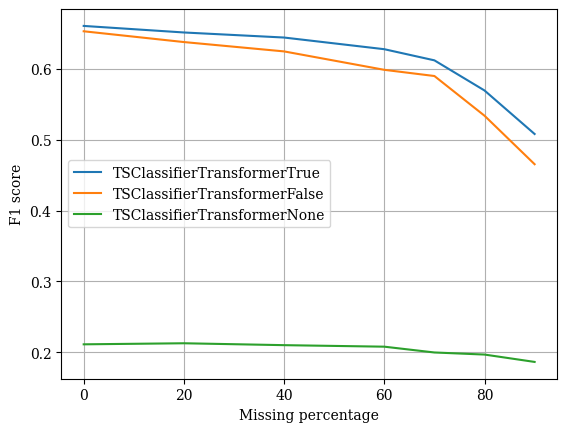

In [3]:
plot_metric(model_mean, metric="F1 score")

['TSClassifierTransformer' 'RidgeClassifier' 'CanonicalIntervalForest'
 'HIVECOTEV2' 'ResNetClassifier']
the null hypothesis over the entire classifiers cannot be rejected
CanonicalIntervalForest    0.0
HIVECOTEV2                 1.0
ResNetClassifier           1.0
RidgeClassifier            0.0
TSClassifierTransformer    5.0
dtype: float64
HIVECOTEV2                 3.857143
CanonicalIntervalForest    3.285714
ResNetClassifier           3.000000
RidgeClassifier            3.000000
TSClassifierTransformer    1.857143
dtype: float64
('CanonicalIntervalForest', 'TSClassifierTransformer', 0.03125, False)
('HIVECOTEV2', 'TSClassifierTransformer', 0.078125, False)
('ResNetClassifier', 'TSClassifierTransformer', 0.078125, False)
('RidgeClassifier', 'TSClassifierTransformer', 0.078125, False)
('CanonicalIntervalForest', 'HIVECOTEV2', 0.109375, False)
('HIVECOTEV2', 'RidgeClassifier', 0.15625, False)
('HIVECOTEV2', 'ResNetClassifier', 0.21875, False)
('CanonicalIntervalForest', 'RidgeClassifier

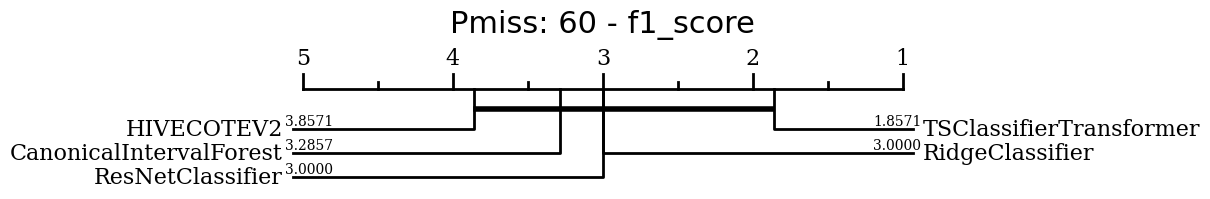

In [11]:
base_path = pathlib.Path("/usr/src/code/data/outputs")
pmiss = 60
metric_name = "f1_score"

datasets = [
    "ERing",
    "Epilepsy",
    "Heartbeat",
    "UWaveGestureLibrary",
    "ArticularyWordRecognition",
    # "EthanolConcentration",
    "Libras",
    "AsphaltPavementTypeCoordinates",
    # "FingerMovements",
    # "Handwriting",
]

models = [
    # "TSClassifierRNN",
    "TSClassifierTransformer",
    "RidgeClassifier",
    "CanonicalIntervalForest",
    "HIVECOTEV2",
    "ResNetClassifier",
]

df = gather_metric_cd(
    f1_score,
    "f1_score",
    base_path,
    datasets,
    models,
    pmiss,
    func_params={"average": "macro"},
)
draw_cd_diagram(metric_name, df, title=f"Pmiss: {pmiss} - {metric_name}", labels=True)